# Importing required modules

In [32]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc


#Visualization
from spacy import displacy
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')

#model
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# Reading the Resume Dataset 
df = pd.read_csv("ResumeDataset.csv")
df.shape

(962, 2)

In [34]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [35]:
# Shuffle the dataset and take top 1000 records

df = df.reindex(np.random.permutation(df.index))
data = df.copy()
data


,Category,Resume
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
271,Health and fitness,Education Details \r\nJanuary 1992 to January ...
380,Java Developer,Education Details \r\n BE IT pjlce\r\nJava D...
924,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
390,Java Developer,Technical Skills (Trained / Project Acquired S...
...,...,...
868,Blockchain,Skills Strong CS fundamentals and problem solv...
30,Data Science,Skills * Programming Languages: Python (pandas...
344,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...
413,Business Analyst,Key Skills - Requirement Gathering - Requireme...


In [36]:
print ("Displaying the distinct categories of resume - \n")
print (data['Category'].unique())

Displaying the distinct categories of resume - 

['Java Developer' 'Health and fitness' 'Testing' 'Database'
 'DevOps Engineer' 'Data Science' 'Automation Testing'
 'Operations Manager' 'PMO' 'HR' 'Sales' 'Electrical Engineering'
 'DotNet Developer' 'Web Designing' 'Hadoop' 'SAP Developer'
 'Civil Engineer' 'Network Security Engineer' 'Advocate' 'Arts'
 'Python Developer' 'Mechanical Engineer' 'Business Analyst' 'Blockchain'
 'ETL Developer']


In [37]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -\n")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Operations Manager           40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

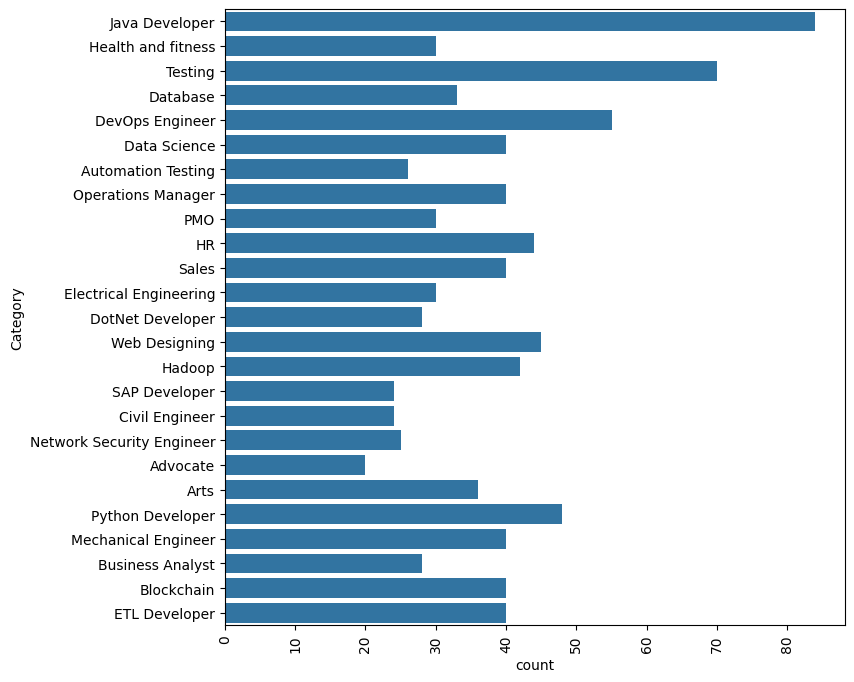

In [38]:
# Visualizing the Category count in data

import seaborn as sns
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

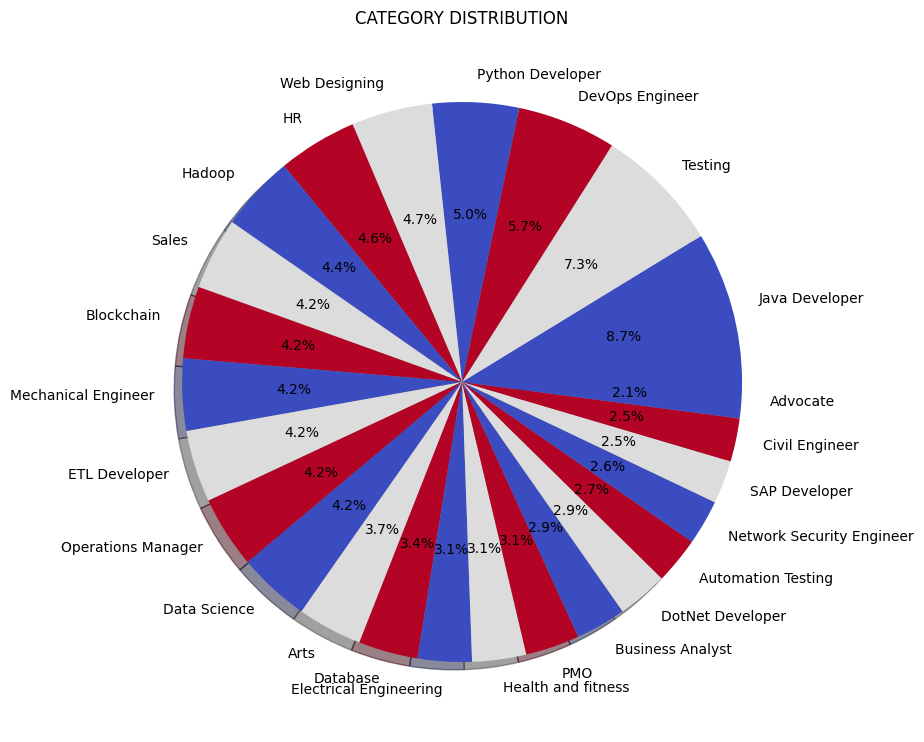

In [39]:
# Visualize the distibution of Categories

from matplotlib.gridspec import GridSpec

targetCounts = data['Category'].value_counts()
targetLabels  = targetCounts.keys()

# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [40]:
# Function to clean the resume text by using vaious regular expressions

import re
def cleanResume(resumeText):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        resumeText,
    )
    review = re.sub('http\S+\s*', ' ', review)  # remove URLs
    review = re.sub('RT|cc', ' ',review )  # remove RT and cc
    review = re.sub('#\S+', '',review )  # remove hashtags
    review = re.sub('@\S+', '  ',review )  # remove mentions
    review = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',review )  # remove punctuations
    review = re.sub(r'[^\x00-\x7f]',r' ', review) 
    review = re.sub('\s+', ' ', review ) # remove extra whitespace
    
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    
    return review
    

In [41]:
# Creating Clean_Resume column to store the cleaned text
data['Clean_Resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [42]:
data.head()

,Category,Resume,Clean_Resume
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",technicalskills springmvc hibernate jdbc java ...
271,Health and fitness,Education Details \r\nJanuary 1992 to January ...,education detail january 1992 january 2003 fir...
380,Java Developer,Education Details \r\n BE IT pjlce\r\nJava D...,education detail pjlce java developer java dev...
924,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
390,Java Developer,Technical Skills (Trained / Project Acquired S...,technical skill trained project acquired skill...


[('project', 721), ('exprience', 663), ('month', 593), ('company', 571), ('detail', 523), ('description', 499), ('data', 386), ('1', 377), ('skill', 374), ('team', 351), ('management', 349), ('system', 316), ('database', 296), ('6', 264), ('client', 258), ('year', 253), ('report', 250), ('service', 249), ('test', 240), ('application', 235), ('requirement', 226), ('java', 223), ('ltd', 223), ('maharashtra', 221), ('technology', 212), ('using', 203), ('server', 201), ('le', 199), ('business', 197), ('developer', 195), ('customer', 194), ('engineering', 192), ('testing', 187), ('january', 183), ('development', 183), ('sql', 182), ('sale', 181), ('pune', 178), ('responsibility', 171), ('c', 170), ('work', 170), ('operation', 166), ('user', 159), ('2', 152), ('software', 151), ('role', 150), ('engineer', 149), ('pvt', 148), ('process', 148), ('activity', 145)]


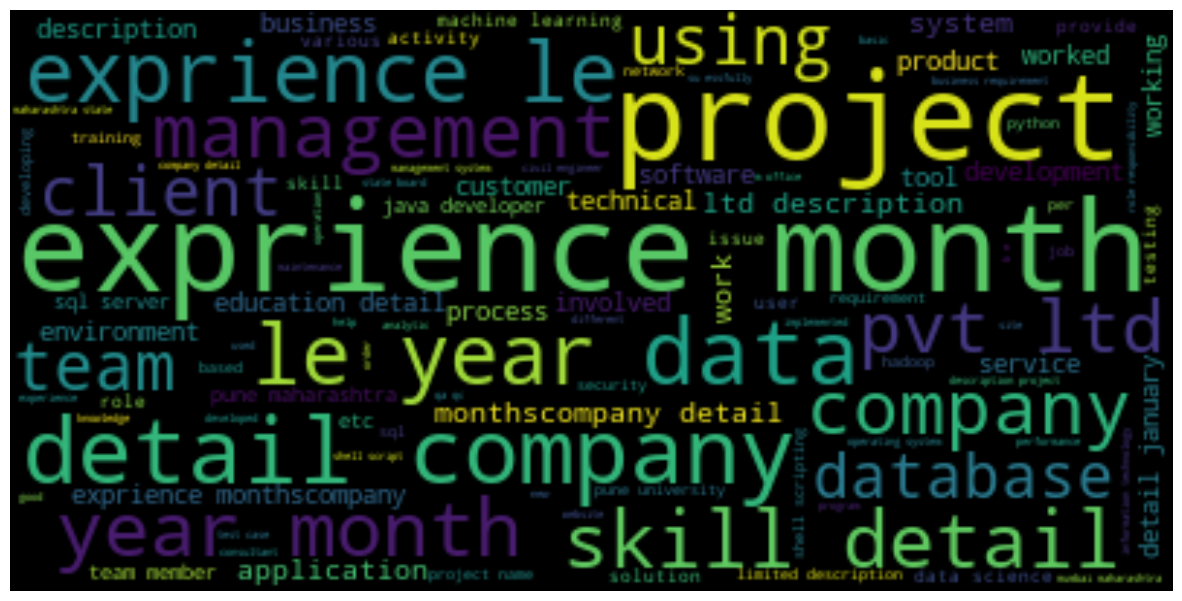

In [43]:
# Processes text data from the 'Clean_Resume' column of the dataset,
# Identifies the most common words, and generates a word cloud

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Clean_Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = Sentences[i]
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
# Define function to load jsonl file and extract the skill-patterns

import json

def load_jsonl(filename):
    d_list = []
    with open(filename, encoding='utf-8', mode='r') as in_f:
        print("Load Jsonl:", filename)
        for line in in_f:
            item = json.loads(line.strip())
            d_list.append(item)
    return d_list

skills = load_jsonl("skill_patterns.jsonl")

Load Jsonl: skill_patterns.jsonl


In [45]:
# Pre-processing the skill-pattern 

for i in range (len(skills)):
    skills[i]['label'] = 'SKILL'

In [46]:
skills

[{'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]},
 {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'aboutness'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'data'}, {'LOWER': 'type'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'interpretation'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'machine'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'control'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'method'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'network'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'accounting'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'active'},
   {'LOWER': 'appearance'},

In [47]:
# Loads the English language model provided by spaCy.
nlp = spacy.load("en_core_web_lg")

In [48]:
# Adds an entity ruler component to the spaCy pipeline
# Enabling named entity recognition (NER) based on custom rules.

ruler = nlp.add_pipe("entity_ruler")
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [49]:
#  Used to add skill-patterns to the entity ruler.
for skill in skills:
        ruler.add_patterns([skill])

In [50]:
# Extracts skills from a given text using spaCy's entity recognition
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_.startswith("SKILL"):
            subset.append(ent.text)
    myset.append(subset)
    return subset

# Returns unique skills
def unique_skills(x):
    return list(set(x))

In [51]:
# Processes the "Clean_Resume" column to extract and store unique skills for each resume
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,Category,Resume,Clean_Resume,skills
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",technicalskills springmvc hibernate jdbc java ...,"[mysql, ionic, angular, framework, computer en..."
271,Health and fitness,Education Details \r\nJanuary 1992 to January ...,education detail january 1992 january 2003 fir...,[]
380,Java Developer,Education Details \r\n BE IT pjlce\r\nJava D...,education detail pjlce java developer java dev...,"[programming language, javascript, java, jquer..."
924,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,"[documentation, certificate, support, function..."
390,Java Developer,Technical Skills (Trained / Project Acquired S...,technical skill trained project acquired skill...,"[angular, framework, operating system, compute..."


In [52]:
# Create a histogram to visualize the distribution of job categories
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [53]:
# Display the unique job categories in the data
Job_cat = data["Category"].unique()
Job_cat

array(['Java Developer', 'Health and fitness', 'Testing', 'Database',
       'DevOps Engineer', 'Data Science', 'Automation Testing',
       'Operations Manager', 'PMO', 'HR', 'Sales',
       'Electrical Engineering', 'DotNet Developer', 'Web Designing',
       'Hadoop', 'SAP Developer', 'Civil Engineer',
       'Network Security Engineer', 'Advocate', 'Arts',
       'Python Developer', 'Mechanical Engineer', 'Business Analyst',
       'Blockchain', 'ETL Developer'], dtype=object)

In [54]:
# Selecting a job category role for further matching 
Job_Category="Data Science"

In [55]:
# Extracting total skills found in the data corresponding to the job category

Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

            
print(f"Skills required in {Job_Category} role : \n\n",unique_skills(Total_skills))

Skills required in Data Science role : 

 ['swift', 'ai', 'natural language processing', 'data science', 'medium', 'operating system', 'bootstrap', 'software', 'dimensionality reduction', 'time series', 'framework', 'design', 'data mining', 'numpy', 'parse', 'cluster analysis', 'computer science', 'deep learning', 'tensorflow', 'artificial intelligence', 'data processing', 'support vector machine', 'linear regression', 'emotion', 'monitoring', 'oracle', 'data model', 'programming language', 'decision tree', 'database', 'plotly', 'javascript', 'machine learning', 'finance', 'electrical engineering', 'data visualization', 'hbase', 'analytics', 'bot', 'computer vision', 'specification', 'security', 'jupyter notebook', 'mysql', 'outlier', 'nlu', 'data flow diagram', 'selenium', 'segment', 'marketing', 'nlp', 'visualization', 'deployment', 'flask', 'scikit learn', 'data analysis', 'object detection', 'kibana', 'debian', 'mobile', 'linux', 'tableau', 'business intelligence', 'regular express

In [56]:
# Create a histogram to visualize the distribution of skills corresponding to the job category

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

Text(0.5, 1.0, 'Most Used Words in Data Science Resume')

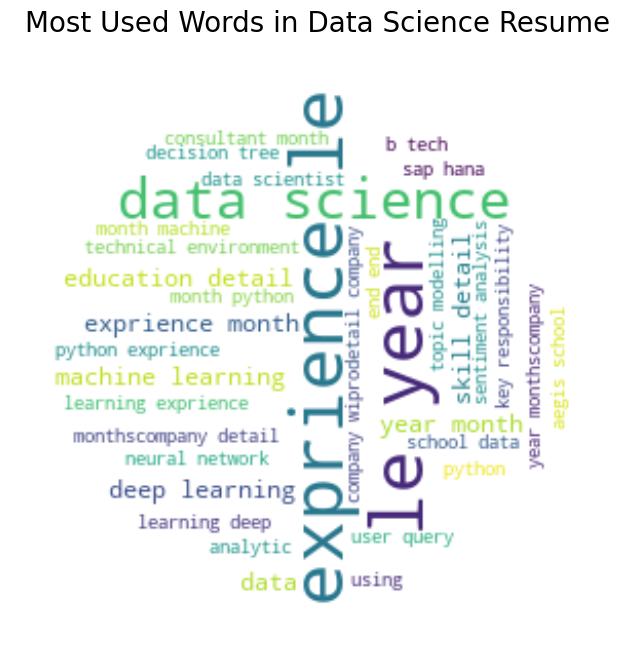

In [57]:
# Create a word cloud showing MOST used words in the corresponding job category

text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [58]:
# Count the frequencies of skills 
# Sort them in descending order.

from collections import Counter

skill_counts = Counter(Total_skills)
skill_freq_dict = dict(skill_counts)

sorted_skill_freq_dict = dict(sorted(skill_freq_dict.items(), key=lambda item: item[1], reverse=True))

print("Skill Frequencies:\n")
print(skill_freq_dict)

print("\nSorted Skill Frequencies:\n")
print(sorted_skill_freq_dict)

Skill Frequencies:

{'google': 4, 'natural language processing': 8, 'data science': 32, 'decision tree': 12, 'programming language': 8, 'database': 20, 'medium': 8, 'machine learning': 32, 'java': 8, 'python': 40, 'analytics': 24, 'operating system': 8, 'linux': 4, 'bot': 12, 'software': 8, 'mysql': 16, 'documentation': 8, 'ubuntu': 8, 'framework': 4, 'library': 4, 'nlu': 4, 'numpy': 12, 'computer science': 12, 'deep learning': 20, 'nlp': 12, 'logistic regression': 4, 'algorithm': 16, 'tensorflow': 4, 'artificial intelligence': 4, 'support vector machine': 4, 'linear regression': 4, 'oracle': 4, 'swift': 4, 'data model': 8, 'support': 4, 'segmentation': 8, 'finance': 4, 'object detection': 4, 'tableau': 16, 'specification': 4, 'time series': 12, 'design': 8, 'data flow diagram': 4, 'diagram': 4, 'visual studio': 4, 'cluster analysis': 8, 'segment': 8, 'marketing': 8, 'data processing': 4, 'deployment': 4, 'business': 20, 'server': 4, 'testing': 4, 'data analysis': 12, 'data visualizati

In [59]:
# Display top N skills from the sorted skill frequency dictionary

import itertools

N = 25
top_skills = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
top_skills_req = list(top_skills.keys())
print(f"Top {N} skills required in {Job_Category} role :\n\n",top_skills_req)

Top 25 skills required in Data Science role :

 ['python', 'data science', 'machine learning', 'analytics', 'database', 'deep learning', 'business', 'mysql', 'algorithm', 'tableau', 'decision tree', 'bot', 'numpy', 'computer science', 'nlp', 'time series', 'data analysis', 'sentiment analysis', 'visualization', 'engineering', 'natural language processing', 'programming language', 'medium', 'java', 'operating system']


In [60]:
# Data Science, Data Analytics

# Skills:
# Proficient in Python and R programming languages.
# Experienced in machine learning techniques such as regression, classification, and dimensionality reduction.
# Skilled in deep learning methodologies including multilayer perceptron, CNN, and LSTM.
# Familiar with natural language processing (NLP) concepts such as sentiment analysis.
# Competent in data analysis and exploratory data analysis (EDA) techniques.
# Experienced in visualization tools like Tableau for data presentation.
# Knowledgeable in database management with MySQL.
# Proficient in computer vision and image processing techniques.
# Familiarity with time series analysis and survival analysis.
# Experienced in optimization algorithms and decision tree methodologies.
# Competent in Flask for web development and NLP applications.
# Proficient in using numpy for numerical computing tasks.
# Skilled in Java programming language for various applications.
# Competent in implementing algorithms and data structures.
# Familiar with sentiment analysis techniques and their application.
# Experienced in programming language theory and implementation.
# Knowledgeable in dimensionality reduction techniques for data preprocessing and feature selection.

# Experience:

# Summer Project Intern
# Indian Institute of Technology Kharagpur
# Aug, 21'–
# Under the guidance of Professor C.S Kumar, Mechanical Engineering

# Worked on a Machine Learning project
# Applied Regression and Classification techniques
# Leveraged Dimensionality Reduction techniques
# Explored Deep Learning models
# Projects:

# 2.5D Visual Sound
# Feb–June, 21'
# Implemented a deep learning model to convert common monaural audio into binaural audio by leveraging video.

# Hybrid Image Formation
# Feb, 21'
# Implemented hybrid image formation, which changes interpretation with viewing distance.

# Harris Corner Detection and SIFT
# Mar, 21'
# Utilized Harris Corner detector and SIFT for locating interest points on an image.

# Hough Line and Circle Detector
# Apr, 21'
# Implemented Hough Line and Circle detection techniques.

# Fundamental Matrix using RANSAC
# May, 21'
# Improved image matching by leveraging epipolar geometry and applying RANSAC.

# Zomato Restaurants Data Analysis
# Sept–Dec, 20'
# Analyzed the best restaurants across cities in India.

# Player Data of FIFA21 Game Analysis
# Nov–Dec, 20'
# Analyzed player performance stats.

# Bankruptcy Data Analysis
# Mar–Apr, 21'
# Analyzed bankruptcy data and used LDA to discriminate bankrupt and non-bankrupt firms.

# Education:

# M.Sc. in Big Data Analytics
# Rabindra Bharati University
# 2020-Present
# GPA: 7.67

# B.Sc. in Mathematics
# Presidency University
# 2017–2020
# CGPA: 7.05

# Higher Secondary
# Jodhpur Park Boys’ School
# 2015–2017
# Marks: 84.2%

# Secondary
# Jodhpur Park Boys’ School
# 2005–2015

# Custom Resume

In [61]:
input_resume="""
Dristanta Das

123 Data Scientist Street
Cityville, State 12345
(123) 456-7890
email@example.com
linkedin.com/in/example

Objective:
Highly skilled Data Scientist with expertise in machine learning, Python programming, and data science techniques. Experienced in deep learning, database management, and business analytics. Seeking opportunities to apply advanced algorithms and visualization tools to drive impactful insights.

Education:
Master of Science in Data Science
ABC University, City, State
Graduated: 2022

Bachelor of Engineering in Computer Science
XYZ University, City, State
Graduated: 2019

Skills:

Proficient in Python programming language, with expertise in NumPy, pandas, and scikit-learn libraries.
Extensive experience in machine learning, deep learning, and data analytics techniques.
Strong understanding of database management systems, including SQL for data manipulation.
Skilled in data visualization using Tableau and other tools to convey insights effectively.
Knowledgeable in business analytics principles and their application to real-world problems.
Familiarity with natural language processing (NLP) techniques for text data analysis.
Experienced in time series analysis and decision tree algorithms for predictive modeling.
Competent in Java programming for software development and engineering tasks.
Proficient in data analysis and visualization using various tools and techniques.
Familiar with medium-scale bot development for automation and data extraction purposes.
Strong background in computer science fundamentals and their application to data science projects.
Experienced in data model design, segmentation, and cluster analysis techniques.
Experience:

Data Scientist
Tech Company XYZ, City, State
June 2022 - Present

Developed and deployed machine learning models to solve complex business problems, resulting in a 15% improvement in efficiency.
Utilized Python and deep learning techniques to enhance image recognition systems, leading to a 20% increase in accuracy.
Designed and implemented database solutions for efficient data storage and retrieval, reducing query time by 25%.
Conducted comprehensive data analysis and visualization using Tableau, facilitating data-driven decision-making processes.
Collaborated with cross-functional teams to develop and deploy NLP algorithms for sentiment analysis, improving customer satisfaction by 30%.
Projects:

Developed a time series forecasting model to predict sales trends, achieving an accuracy rate of 85%.
Implemented a decision tree algorithm to classify customer segments and personalize marketing strategies, resulting in a 20% increase in conversion rates.
Certifications:

Data Science Certification, Coursera, 2021
Machine Learning Engineer Nanodegree, Udacity, 2020



"""

In [62]:
# Clean the input resume using defined function
cleaned_input = cleanResume(input_resume)
cleaned_input

'dristanta da 123 data scientist street cityville state 12345 123 456 7890 email com linkedin com example objective highly skilled data scientist expertise machine learning python programming data science technique experienced deep learning database management business analytics seeking opportunity apply advanced algorithm visualization tool drive impactful insight education master science data science abc university city state graduated 2022 bachelor engineering computer science xyz university city state graduated 2019 skill proficient python programming language expertise numpy panda scikit learn library extensive experience machine learning deep learning data analytics technique strong understanding database management system including sql data manipulation skilled data visualization using tableau tool convey insight effectively knowledgeable business analytics principle application real world problem familiarity natural language processing nlp technique text data analysis experienc

In [63]:
# Display each named entity along with its entity label detected in the text 

dcm = nlp(cleaned_input)

for ent in dcm.ents:
       print(f"{ent.text} - Label: {ent.label_}")

dristanta da 123 - Label: ORG
cityville - Label: ORG
12345 - Label: CARDINAL
machine learning - Label: SKILL
python - Label: SKILL
data science - Label: SKILL
deep learning - Label: SKILL
database - Label: SKILL
business - Label: SKILL
analytics - Label: SKILL
algorithm - Label: SKILL
visualization - Label: SKILL
data science - Label: SKILL
abc university city state - Label: ORG
2022 - Label: CARDINAL
engineering - Label: SKILL
computer science - Label: SKILL
xyz university city state - Label: ORG
2019 - Label: DATE
python - Label: SKILL
programming language - Label: SKILL
numpy - Label: SKILL
scikit learn - Label: SKILL
library - Label: SKILL
machine learning - Label: SKILL
deep learning - Label: SKILL
analytics - Label: SKILL
database - Label: SKILL
sql - Label: ORG
data visualization - Label: SKILL
tableau - Label: SKILL
business - Label: SKILL
analytics - Label: SKILL
natural language processing - Label: SKILL
nlp - Label: SKILL
data analysis - Label: SKILL
time series - Label: SKI

In [64]:
# Add patterns to the entity ruler to recognize entities corresponding to the job categories.
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [65]:
# Set up colors and options for rendering entities

colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(cleaned_input)
displacy.render(sent, style="ent", jupyter=True, options=options)

In [66]:
# Generates a dependency parse visualization for the first 10 tokens of the processed text
# Is helpful for understanding the grammatical structure and dependencies within the text.

displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [67]:
# Display top N skills required for the job category role

print(f"Top {N} skills required for {Job_Category} role : ")
top_skills_req

Top 25 skills required for Data Science role : 


['python',
 'data science',
 'machine learning',
 'analytics',
 'database',
 'deep learning',
 'business',
 'mysql',
 'algorithm',
 'tableau',
 'decision tree',
 'bot',
 'numpy',
 'computer science',
 'nlp',
 'time series',
 'data analysis',
 'sentiment analysis',
 'visualization',
 'engineering',
 'natural language processing',
 'programming language',
 'medium',
 'java',
 'operating system']

In [68]:
# Calculate the percentage score of required skills present in the resume

import itertools

resume_skills = unique_skills(get_skills(cleaned_input))
N = len(resume_skills)

req_skills_dict = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
req_skills = list(req_skills_dict.keys())

score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)

match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 88.2% matched to your requirements


In [69]:
# Display input resume skills and required skills

print("Resume Skills : \n",resume_skills,"\n")
print(f"Required Skills for {Job_Category} : \n",req_skills)

Resume Skills : 
 ['natural language processing', 'data model', 'data science', 'programming language', 'decision tree', 'database', 'scikit learn', 'segmentation', 'medium', 'data analysis', 'machine learning', 'java', 'python', 'data visualization', 'analytics', 'bot', 'tableau', 'software', 'sentiment analysis', 'time series', 'design', 'library', 'numpy', 'engineering', 'cluster analysis', 'computer science', 'segment', 'deep learning', 'marketing', 'nlp', 'algorithm', 'data extraction', 'visualization', 'business'] 

Required Skills for Data Science : 
 ['python', 'data science', 'machine learning', 'analytics', 'database', 'deep learning', 'business', 'mysql', 'algorithm', 'tableau', 'decision tree', 'bot', 'numpy', 'computer science', 'nlp', 'time series', 'data analysis', 'sentiment analysis', 'visualization', 'engineering', 'natural language processing', 'programming language', 'medium', 'java', 'operating system', 'software', 'documentation', 'ubuntu', 'data model', 'segmenta

# Classifier

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Retrieve unique labels from the "Category" column
labels = data['Category'].unique()

# Fit the LabelEncoder to these labels
le.fit(labels)

LabelEncoder()

In [71]:
# Encode the categories into numerical values using LabelEncoder
data["Label"] = le.fit_transform(data["Category"])

In [72]:
data.head()

,Category,Resume,Clean_Resume,skills,Label
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",technicalskills springmvc hibernate jdbc java ...,"[mysql, ionic, angular, framework, computer en...",15
271,Health and fitness,Education Details \r\nJanuary 1992 to January ...,education detail january 1992 january 2003 fir...,[],14
380,Java Developer,Education Details \r\n BE IT pjlce\r\nJava D...,education detail pjlce java developer java dev...,"[programming language, javascript, java, jquer...",15
924,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,"[documentation, certificate, support, function...",23
390,Java Developer,Technical Skills (Trained / Project Acquired S...,technical skill trained project acquired skill...,"[angular, framework, operating system, compute...",15


In [73]:
# Prepare data for machine learning by converting it into TF-IDF feature vectors
# Splitting it into training and testing sets.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Clean_Resume'].values
requiredTarget = data['Label'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [74]:
# Initializes OneVsRestClassifier with a KNN classifier as the base estimator 
clf = OneVsRestClassifier(KNeighborsClassifier())

# Trains the classifier using the provided training data
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [75]:
# Make predictions on the testing data 
prediction = clf.predict(X_test)

In [76]:
# Display performance of the classifier on both the training and testing data

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.73      0.84        11
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.

In [77]:
# Save the trained classifier

import joblib
joblib.dump(clf, 'model.joblib')

['model.joblib']

In [78]:
# Previously cleaned input resume
cleaned_input

'dristanta da 123 data scientist street cityville state 12345 123 456 7890 email com linkedin com example objective highly skilled data scientist expertise machine learning python programming data science technique experienced deep learning database management business analytics seeking opportunity apply advanced algorithm visualization tool drive impactful insight education master science data science abc university city state graduated 2022 bachelor engineering computer science xyz university city state graduated 2019 skill proficient python programming language expertise numpy panda scikit learn library extensive experience machine learning deep learning data analytics technique strong understanding database management system including sql data manipulation skilled data visualization using tableau tool convey insight effectively knowledgeable business analytics principle application real world problem familiarity natural language processing nlp technique text data analysis experienc

In [79]:
# Transform cleaned input text into TF-IDF feature vectors for prediction 

custom_features = word_vectorizer.transform([cleaned_input])

print("Shape of custom features:", custom_features.shape)

Shape of custom features: (1, 1500)


In [80]:
# Predict class label for the input resume using the classifier
# Return the predicted class label in their original categorical form

pred = clf.predict(custom_features)
pred_class = le.inverse_transform(pred)

print(f"Your resume matches the '{pred_class[0]}' job category.")

Your resume matches the 'Data Science' job category.


# Ranking multiple resumes matching JD

In [81]:
# Reading the test resumes dataset

test_ds = pd.read_csv('Test_Resumes.csv')
test_ds

,Category,Resume_text
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U..."
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US..."
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow..."
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,..."
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,..."


In [82]:
# Cleaning the resume text and storing in separate column

test_ds["Cleaned_text"] = test_ds.Resume_text.apply(lambda x : cleanResume(x))
test_ds

,Category,Resume_text,Cleaned_text
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...


In [83]:
# Extracting skills from cleaned resume text and storing unique skills in 'skills' column

test_ds["skills"] = test_ds["Cleaned_text"].str.lower().apply(get_skills)
test_ds["skills"] = test_ds["skills"].apply(unique_skills)
test_ds

,Category,Resume_text,Cleaned_text,skills
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[debugging, programming language, database, ja..."
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[natural language processing, data science, fl..."
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]"
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[simulation, design, civil engineering, engine..."
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[natural language processing, flask, data scie..."


In [84]:
# Predicting the class labels(Category) for each resume in the test data using the trained classifier 

predictions = []
for text in test_ds['Cleaned_text'].values:
    custom_features = word_vectorizer.transform([text])
    
    pred = clf.predict(custom_features)
    
    pred_class = le.inverse_transform(pred)
    predictions.append(pred_class)
    
predictions

[array(['Java Developer'], dtype=object),
 array(['Data Science'], dtype=object),
 array(['Health and fitness'], dtype=object),
 array(['Civil Engineer'], dtype=object),
 array(['Data Science'], dtype=object)]

In [85]:
# Storing the predicted categories in a separate column

test_ds["Predicted Category"] = predictions
test_ds

,Category,Resume_text,Cleaned_text,skills,Predicted Category
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[debugging, programming language, database, ja...",[Java Developer]
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[natural language processing, data science, fl...",[Data Science]
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness]
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[simulation, design, civil engineering, engine...",[Civil Engineer]
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[natural language processing, flask, data scie...",[Data Science]


In [86]:
# Define a function to calculate match score for a resume corresponding to the job category skills

import itertools

def score_calc(resume_skills):
    N = len(resume_skills)
    req_skills_dict = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
    req_skills = list(req_skills_dict.keys())
    score = 0
    for x in req_skills:
        if x in resume_skills:
            score += 1
    match = round(score / N * 100, 1)
    
    return match

In [87]:
# Calculate the score for each resume in the test data and store in a separate column

test_ds["Match Score(%)"] = test_ds.skills.apply(lambda x : score_calc(x))
test_ds

,Category,Resume_text,Cleaned_text,skills,Predicted Category,Match Score(%)
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[debugging, programming language, database, ja...",[Java Developer],18.2
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[natural language processing, data science, fl...",[Data Science],61.8
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness],0.0
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[simulation, design, civil engineering, engine...",[Civil Engineer],0.0
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[natural language processing, flask, data scie...",[Data Science],63.3


In [88]:
# Sort the resulting data by the match score in descending order to list resumes with the most probability of getting hired

test_ds.sort_values('Match Score(%)',ascending=False)

,Category,Resume_text,Cleaned_text,skills,Predicted Category,Match Score(%)
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[natural language processing, flask, data scie...",[Data Science],63.3
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[natural language processing, data science, fl...",[Data Science],61.8
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[debugging, programming language, database, ja...",[Java Developer],18.2
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness],0.0
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[simulation, design, civil engineering, engine...",[Civil Engineer],0.0
